In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

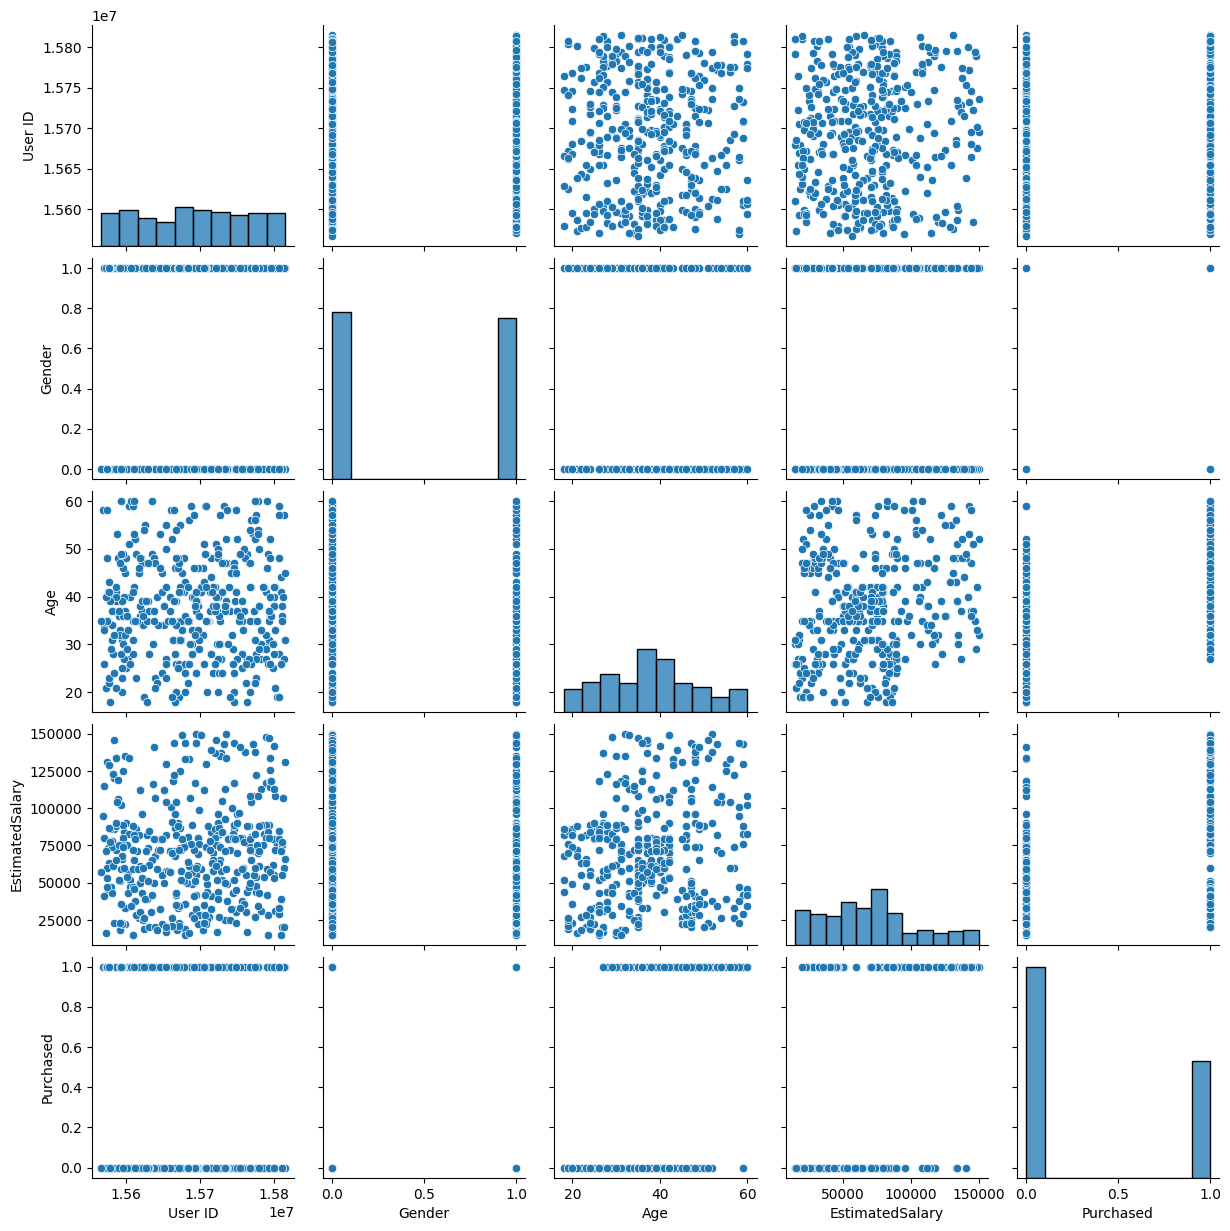

In [5]:
sns.pairplot(df)

In [6]:
df.corr(numeric_only=True)

,User ID,Gender,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.025249,-0.000721,0.071097,0.007120
Gender,-0.025249,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.000721,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,-0.060435,0.155238,1.000000,0.362083
Purchased,0.007120,-0.042469,0.622454,0.362083,1.000000


In [9]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [10]:
x = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [12]:
from sklearn.linear_model import LogisticRegressionCV
model = LogisticRegressionCV()
model.fit(x_train, y_train)

LogisticRegressionCV()

In [13]:
y_pred = model.predict(x_test)

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[64,  1],
       [13, 22]], dtype=int64)

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.86

In [15]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.9565217391304348

In [16]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.6285714285714286

In [18]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.7586206896551724

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90        65
           1       0.96      0.63      0.76        35

    accuracy                           0.86       100
   macro avg       0.89      0.81      0.83       100
weighted avg       0.88      0.86      0.85       100



In [23]:
y_proba = model.predict_proba(x_test)[:, 1]
y_proba

array([0.54564362, 0.46635767, 0.36273635, 0.24086676, 0.39475179,
       0.23914534, 0.18942749, 0.28815945, 0.38399123, 0.26825253,
       0.3539771 , 0.16113667, 0.56110244, 0.39853564, 0.46624687,
       0.30996526, 0.42105801, 0.36273635, 0.27271787, 0.21930346,
       0.49749701, 0.39564931, 0.23722667, 0.43556327, 0.213232  ,
       0.47256011, 0.32054537, 0.55552195, 0.70615986, 0.68922831,
       0.36029565, 0.55897196, 0.43305033, 0.30283557, 0.62161186,
       0.46907618, 0.30435032, 0.28162659, 0.50955189, 0.22280869,
       0.59383351, 0.19802386, 0.35200232, 0.69605492, 0.45201457,
       0.39826325, 0.19575811, 0.21564577, 0.27942269, 0.36859277,
       0.37865252, 0.40742724, 0.36439411, 0.26273159, 0.42630615,
       0.6670948 , 0.27942269, 0.55858199, 0.32193511, 0.32714497,
       0.65151432, 0.51813022, 0.41931252, 0.39420885, 0.58645997,
       0.34123795, 0.46814112, 0.18506632, 0.46502976, 0.27782373,
       0.59619096, 0.32243149, 0.5711027 , 0.50005408, 0.45960

In [24]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.8065934065934067

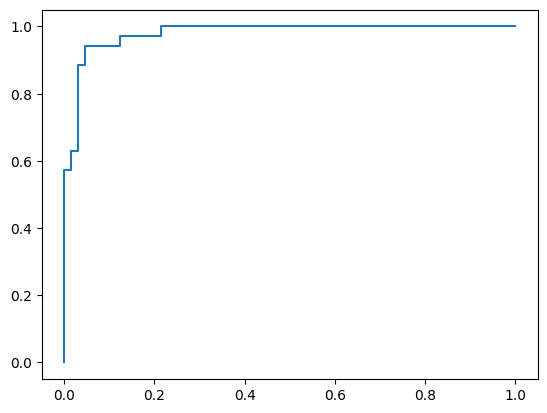

In [26]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr)

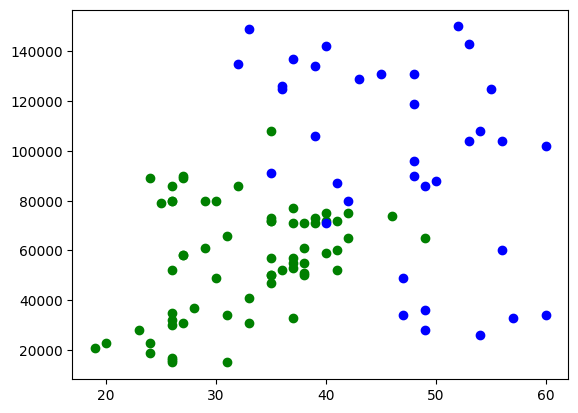

In [28]:
plt.scatter(
    x_test['Age'][y_test == 0], x_test['EstimatedSalary'][y_test == 0],
    color='green'
)

plt.scatter(
    x_test['Age'][y_test == 1], x_test['EstimatedSalary'][y_test == 1],
    color='blue'
)

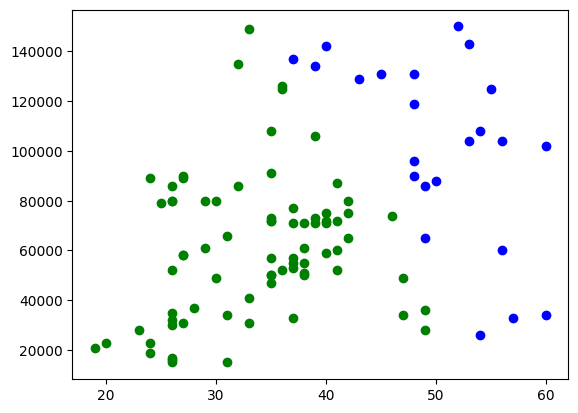

In [29]:
plt.scatter(
    x_test['Age'][y_pred == 0], x_test['EstimatedSalary'][y_pred == 0],
    color='green'
)

plt.scatter(
    x_test['Age'][y_pred == 1], x_test['EstimatedSalary'][y_pred == 1],
    color='blue'
)